In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import joblib

In [3]:
fashion_dataset = pd.read_csv('../Datasets/fashion-mnist_train.csv')
fashion_dataset_test = pd.read_csv('../Datasets/fashion-mnist_test.csv')

# 1.) Exploratory Data Analysis

In [4]:
fashion_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = fashion_dataset.drop('label',axis=1)
y = fashion_dataset.loc[:,['label']]

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

,label
0,2
1,9
2,6
3,0
4,3


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [9]:
X.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [10]:
X.shape

(60000, 784)

In [99]:
image = np.array(X.iloc[6000]).reshape(28,28)

<AxesSubplot:>

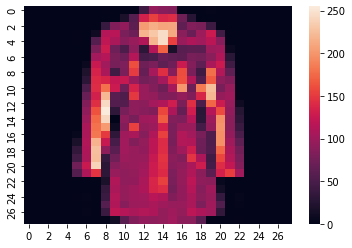

In [100]:
sns.heatmap(image)

# 2.) Model Creation

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.3, stratify=y, random_state=10)

In [15]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50593,0,0,0,0,0,0,0,0,0,0,...,129,129,129,132,137,134,124,162,94,0
43030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18991,0,0,0,0,0,0,0,0,0,0,...,2,0,0,175,173,183,83,0,0,0
4759,0,0,0,0,0,0,0,0,0,0,...,28,26,37,32,5,0,1,0,0,0


In [16]:
rf_model = RandomForestClassifier()

In [23]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
rf_params = {
'bootstrap': [True,False],
 'criterion': ['gini'],
 'n_estimators': [10,20,30,40,50]
}

In [28]:
clf = GridSearchCV(rf_model, param_grid= rf_params, cv= 5)
clf.fit(X_train,y_train)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [29]:
clf.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 50}

In [32]:
rf_params_best = {
'bootstrap': [True],
 'criterion': ['gini'],
 'n_estimators': [50]
}

In [33]:
clf_best = GridSearchCV(rf_model, param_grid= rf_params_best, cv= 5)
clf_best.fit(X_train,y_train)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Priyesh Dave\

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'n_estimators': [50]})

In [35]:
pred_train = clf_best.predict(X_train)
pred_val = clf_best.predict(X_val)

In [36]:
print("Training : ",metrics.accuracy_score(y_train,pred_train))
print("Test : ",metrics.accuracy_score(y_val,pred_val))

Training :  0.9998809523809524
Test :  0.8763888888888889


In [102]:
from sklearn.metrics import classification_report
classification_report(y_val,pred_val).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.82      0.87      0.84      1800',
 '           1       0.99      0.96      0.98      1800',
 '           2       0.76      0.81      0.78      1800',
 '           3       0.87      0.91      0.89      1800',
 '           4       0.77      0.81      0.79      1800',
 '           5       0.96      0.97      0.97      1800',
 '           6       0.72      0.58      0.64      1800',
 '           7       0.95      0.94      0.94      1800',
 '           8       0.96      0.97      0.97      1800',
 '           9       0.95      0.95      0.95      1800',
 '',
 '    accuracy                           0.88     18000',
 '   macro avg       0.88      0.88      0.87     18000',
 'weighted avg       0.88      0.88      0.87     18000',
 '']

In [136]:
best_model = 'clf_RandomForest'

# 3.) Predicitions

In [37]:
fashion_dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_test = fashion_dataset_test.drop('label',axis=1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y_test = fashion_dataset_test.loc[:,['label']]
y_test.head()

,label
0,0
1,1
2,2
3,2
4,3


In [46]:
X_test.shape

(10000, 784)

In [50]:
label_dict = {
  0 : 'T-Shirt/Top',
  1 : 'Trouser',
  2 : 'Pullover',
  3 : 'Dress',
  4 : 'Coat',
  5 : 'Sandal',
  6 : 'Shirt',
  7 : 'Sneaker',
  8 : 'Bag',
  9 : 'Ankle Boot'
}

It is a: Dress
Your model predicted: Shirt


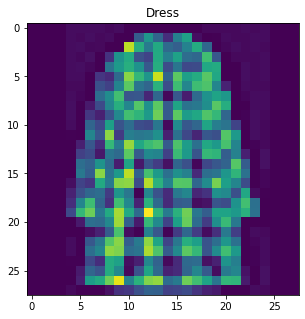

In [145]:
random_number = np.random.randint(0,10000)

test_data = X_test.iloc[random_number]
actual_value = int(y_test.iloc[random_number])

predicted_value = clf_best.predict([test_data])[0]

print('It is a: {}'.format(label_dict[actual_value]))
print('Your model predicted: {}'.format(label_dict[predicted_value]))

plt.figure(figsize=(12,5))
plt.title('{}'.format(label_dict[actual_value]))
plt.imshow(np.array(test_data).reshape(28,28), )


# 4.) Saving the model

In [137]:
filename = '../Models/{}.sav'.format(best_model)

In [140]:
status = joblib.dump(best_model,filename)
if status : print('Model saved successfully.')
else : print('Error saving the model!')

Model saved successfully.
